# Data Visualizations
### Types of Data Visualizations
1. Relationships
    - Scatterplot - relationship between two variables (x and y)
    - Bubble chart - relationship between three variables (x, y, and bubble size)
2. Comparisons
    - Bar chart - Compare a list of values (x) to a single value (y)
    - Line chart - Compare change in a single value (x) over time (y)
3. Distribution
    - Histogram - distribution of a single value (x)
    - Box plot - gives a clear view of how the points in a data are arranged. (min, max, median, majority, outliers)
4. Compositions
    - Pie chart - How much of a single value (x) is made up by a list of values (y)
    - Stacked bar chart - Comaprisons of multiple values againts two other values (x and y)
    - Stacked area chart - Distributions of multiple values against two other values (x and y)

In [1]:
#!pip install lib_name

### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Reading the raw data

In [3]:
penguin_df = pd.read_csv('palmerpenguins.csv')
penguin_df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [4]:
penguin_df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

### Keeping only the necessary columns

In [5]:
columns_to_keep = ['Sample Number',
                   'Species',
                   'Culmen Length (mm)',
                   'Culmen Depth (mm)',
                   'Flipper Length (mm)',
                   'Body Mass (g)'
                   ]

penguin_df = penguin_df[columns_to_keep]

penguin_df.set_index('Sample Number', inplace=True)
penguin_df.head(2)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Sample Number,,,,,
1,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
2,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0


### Cleaning the data

In [6]:
new = penguin_df["Species"].str.split("(", n = 1, expand = True)

penguin_df["Species"] = new[0]
penguin_df["Name"] = new[1]
penguin_df["Label"] = new[0]

In [7]:
species = {'Adelie Penguin ':1, 'Chinstrap penguin ':2, 'Gentoo penguin ':3}
penguin_df.Label = [species[item] for item in penguin_df.Label]

X = penguin_df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
X = X.fillna(X.mean())

y = penguin_df['Label']
y = y.fillna(y.mean())

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Relationships
   - Scatterplot

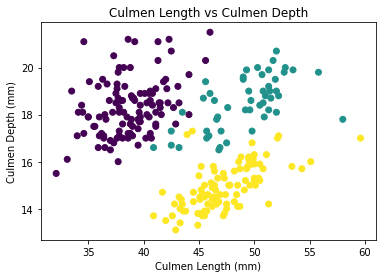

In [9]:
# plotting scatter plots for all three labels in X_train, y_train
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs Culmen Depth')
plt.show()


#### Relationships
   - Bubble chart

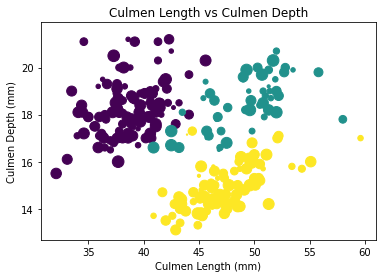

In [10]:
# Plot Bubble Chart
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap='viridis', s=X_train.iloc[:,3]%140)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs Culmen Depth')
plt.show()

#### Comparisons
   - Bar chart

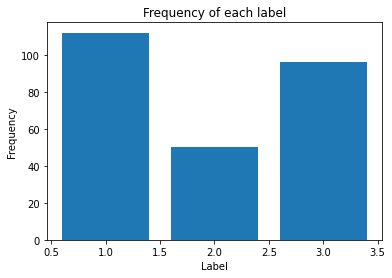

In [11]:
# Plot Bar Chart of frequency of each label
plt.bar(y_train.value_counts().index, y_train.value_counts())
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of each label')
plt.show()

### Changing the dataset
Using the spotify songs data now

In [12]:
sp_data = pd.read_csv('spotify.csv', index_col="Date", parse_dates=True)
sp_data.tail(3)

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


#### Comparisons
   - Line chart

<AxesSubplot:title={'center':'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Date'>

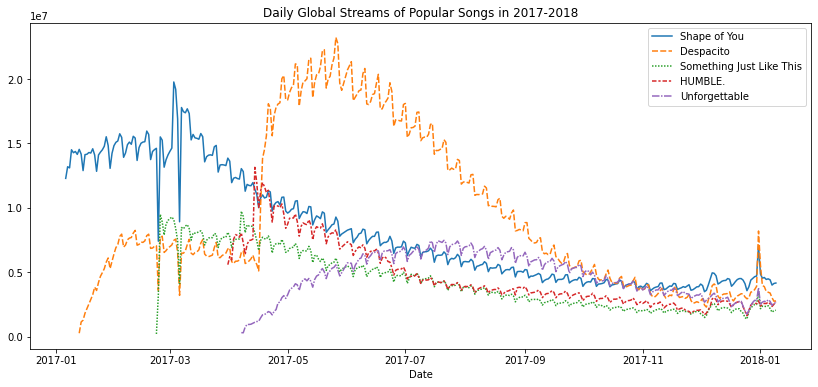

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of each song 
sns.lineplot(data=sp_data)

### Changing the dataset
Switching to the most popular 'iris' dataset.m

In [14]:
iris_data = pd.read_csv('iris.csv', index_col="Id")
iris_data.head(2)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


- Distribution
    - Histogram

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Count'>

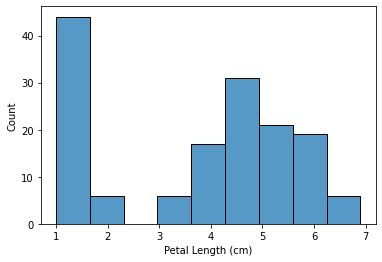

In [15]:
# how petal length varies in iris flowers
sns.histplot(iris_data['Petal Length (cm)'])

- Distribution
    - Box plot

<AxesSubplot:>

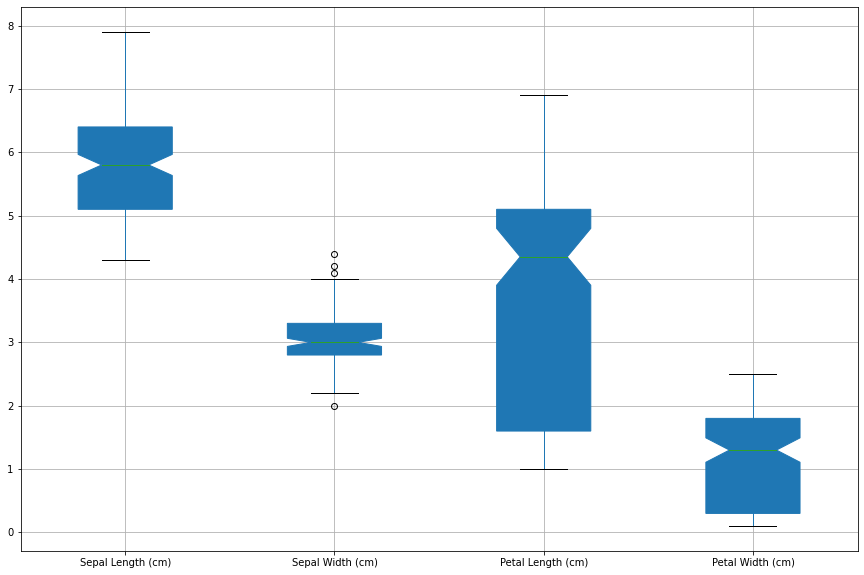

In [16]:
# Plot box plot of petal length
new_data = iris_data.iloc[:,:5]
plt.figure(figsize = (15, 10))
new_data.boxplot(vert=True, patch_artist=True, meanline=True, showfliers=True, notch=True)
#X_train.boxplot(vert=True, meanline=True, color='red')


#### Compositions
   - Pie chart

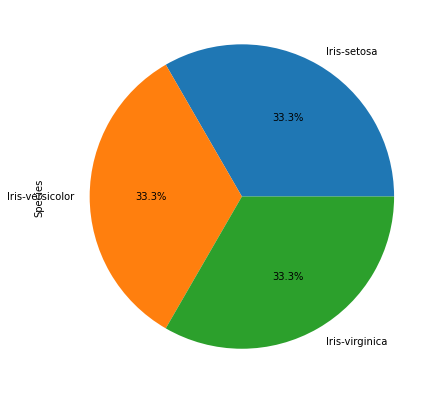

In [17]:
# plot pie chart of species
plt.figure(figsize = (10, 7))
iris_data.Species.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#### Compositions
   - Stacked bar chart

<Figure size 1080x720 with 0 Axes>

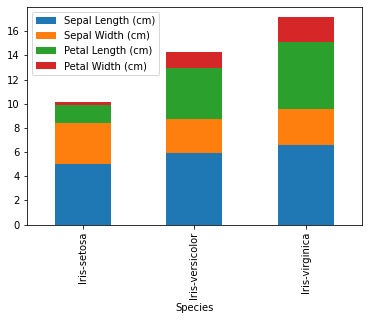

In [18]:
# plot stacked bar chart of species with their mean petal length
mean_p = iris_data.groupby('Species').mean()
plt.figure(figsize = (15, 10))
mean_p.plot(kind='bar', stacked=True)
plt.show()

#### Compositions
   - Stacked area chart

<Figure size 1080x720 with 0 Axes>

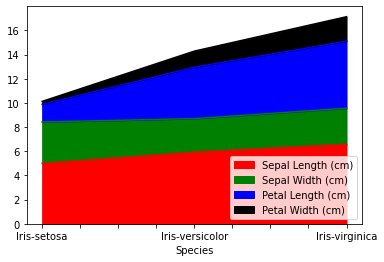

In [19]:
# Plot stacked area chart of species with their mean petal length
mean_p = iris_data.groupby('Species').mean()
plt.figure(figsize = (15, 10))
mean_p.plot(kind='area', stacked=True, color=['red', 'green', 'blue', 'black'])
plt.show()

### Bonus: 3D scatter-plot

Interactive 3D plot where you can look around the plot for different insights.<br>
(You might need to run these two cells again.)

In [30]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


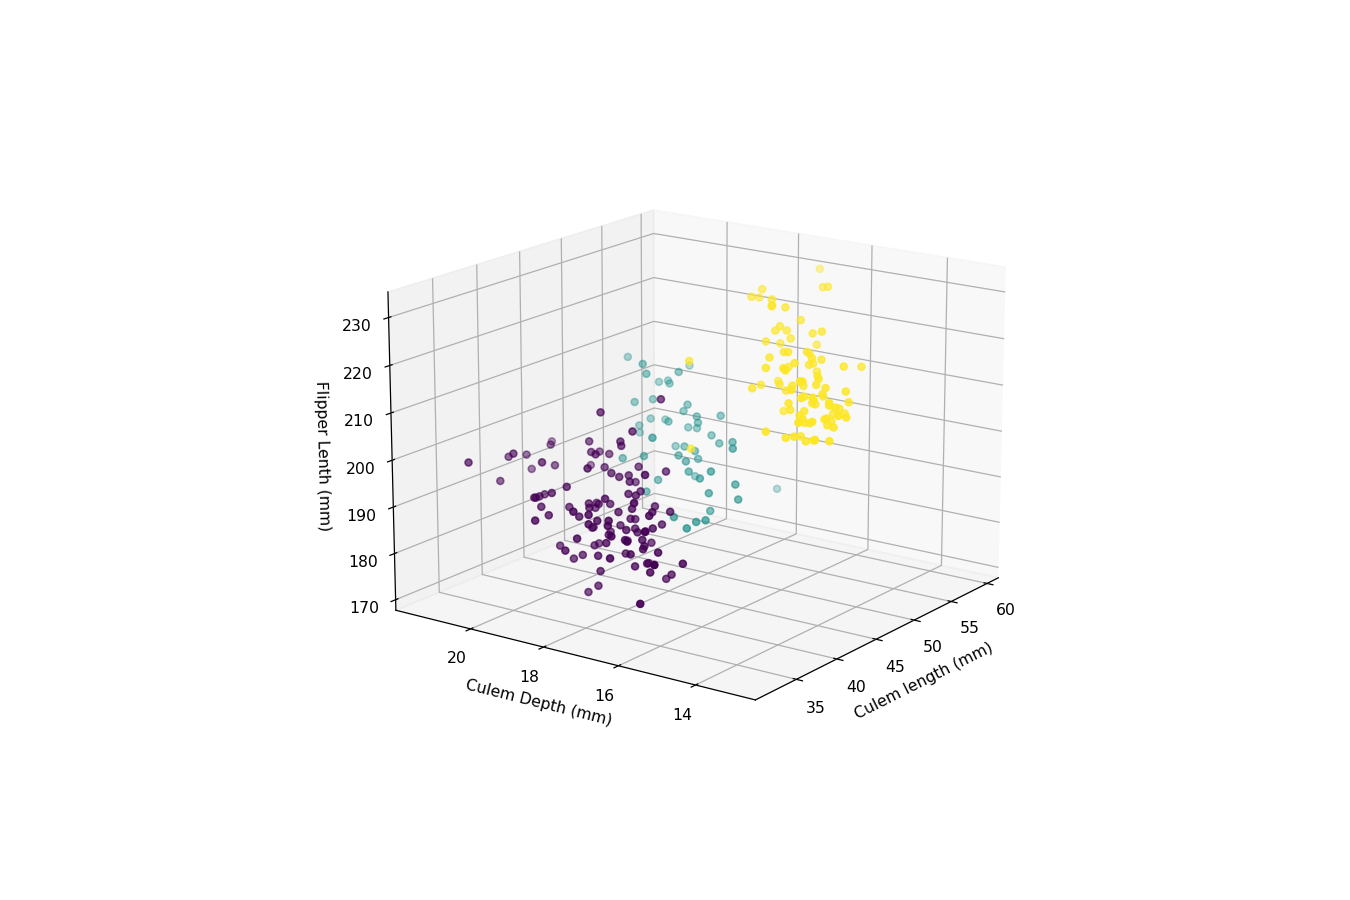

In [31]:
%matplotlib notebook

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection = '3d', aspect='auto')
ax.scatter(X_train['Culmen Length (mm)'], X_train['Culmen Depth (mm)'], X_train['Flipper Length (mm)'], c = y_train, marker = 'o', s=20)
ax.set_xlabel('Culem length (mm)')
ax.set_ylabel('Culem Depth (mm)')
ax.set_zlabel('Flipper Lenth (mm)')
plt.show()

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [23]:
model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs'))

In [24]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9767441860465116
[[39  1  0]
 [ 1 17  0]
 [ 0  0 28]]


### Bonus: HeatMap

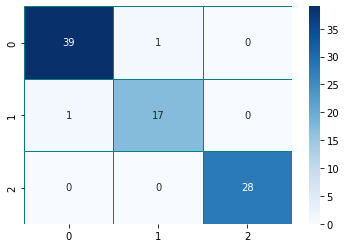

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,linewidths=1, linecolor='teal', fmt='d', cmap='Blues')
plt.show()

### Using the trained model

In [28]:
def what_penguin(lst):
    res = model.predict([lst])
    for key, value in species.items():
        if value == res:
            return key

In [29]:
print(what_penguin(X_test.iloc[0, :]))

Chinstrap penguin 


C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
